# Introduction to Qiskit

**A brief review**

1. Qubits: A *normalized* column vector $\quad$
    $|0> = \begin{pmatrix} 1\\ 0 \end{pmatrix}$
    $|1> = \begin{pmatrix} 0\\ 1 \end{pmatrix}$ $\quad$ $|\psi> = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \alpha|0> + \beta|1>$.

2. Measurement: Qubit collapses to $|0>$ or $|1>$; $\quad$ measure $|\psi>$ $\Rightarrow$ $|0>$ with probability $|\alpha|^2$, $|1>$ with probability $|\beta|^2$ $\Rightarrow$ $|\alpha|^2 + |\beta|^2 = 1$.

3. Gates: Quantum gates are unitary operators $U|\psi> = |\phi>$. Action of any quantum gate is a rotation on the Bloch sphere.

###  Importing the required libraries

In [ ]:
# !pip install qiskit
# !pip install qiskit-aer
# !pip install 'qiskit[visualization]'

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

### The first quantum circuit

We can define the number of quantum and classical registers that we want. A quantum register is a qubit, and a classical register is a bit that will hold the measurement outcome of the qubit. A QuantumCircuit is an object that takes the quantum and classical registers.

In [28]:
# initialize a quantum circuit with 2 qubits and 2 cbits

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

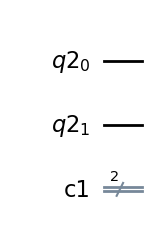

In [29]:
qc.draw('mpl')

All qubits are initialized in |0>. In the Bloch sphere representation, this is the north pole. This is a 2-qubit system, so there should be two Bloch spheres, one for each qubit -- both of them pointing to the north pole.

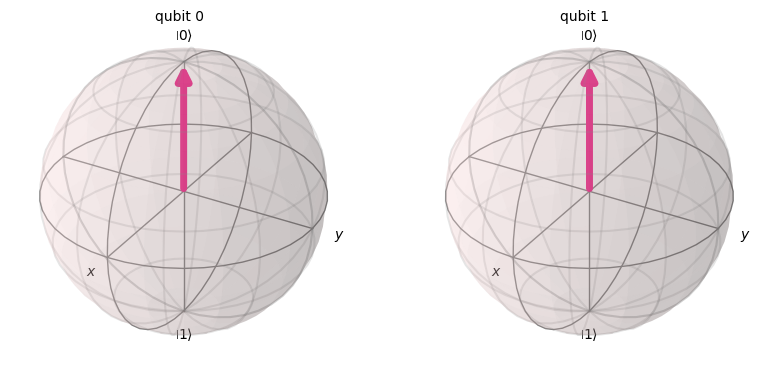

In [30]:
plot_bloch_multivector(qc)

Let us now measure the qubits. Since the qubits are in state |00>, the outcome should be 00 itself with probability 1.

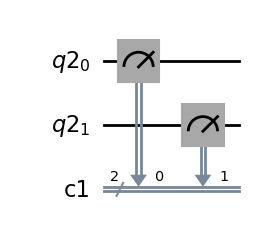

In [31]:
qc.measure(qr,cr)
qc.draw('mpl')

In order to simulate the circuit, we need to define a simulator to run the circuit. We shall use Qiskit Aer for simulation.

In [32]:
from qiskit_aer import Aer

We will use Statevector simulator to simulate statevectors

In [35]:
simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()

To retrieve the statevector, we will use the `get_statevector()` method.

In [36]:
sv = result.get_statevector()
print(sv)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Let's create a bell state $\ket{\Phi^+}$

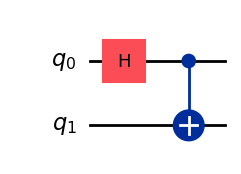

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

Let us verify our notion using Bloch sphere.

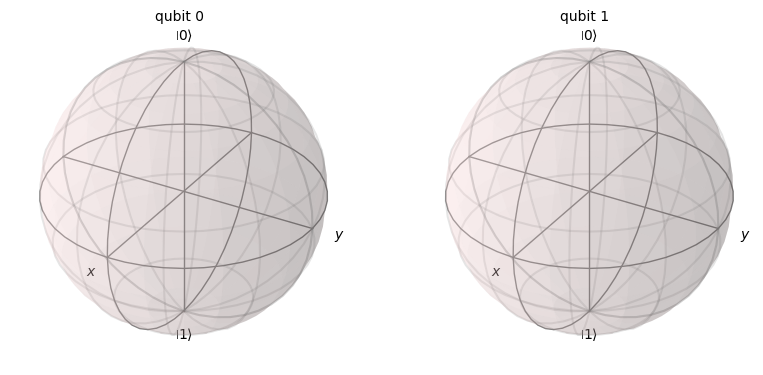

In [38]:
plot_bloch_multivector(qc)

When we measure these two qubits, the first qubit should collapse to 1, and the second to 0, with probability 1.

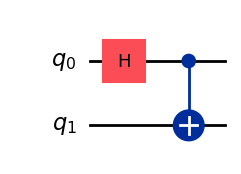

In [39]:
qc.draw('mpl')

In [40]:
result = simulator.run(qc).result()
sv = result.get_statevector()
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


To simulate the same circuit using shot based simulater, we will use QASM simulator

In [41]:
simulator = Aer.get_backend("qasm_simulator")
qc.measure_all()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'11': 531, '00': 493}


### Try out questions
Let's build some circuits and get our hands dirty.

Q1. Let's create all the bell states $\ket{\Phi^+}, \ket{\Phi^-}, \ket{\Psi^+}, \ket{\Psi^-}$ 

In [42]:
simulator = Aer.get_backend("statevector_simulator")

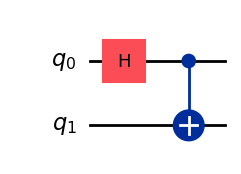

In [43]:
phi_plus =QuantumCircuit(2)
phi_plus.h(0)
phi_plus.cx(0,1)

result = simulator.run(phi_plus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
phi_plus.draw("mpl")

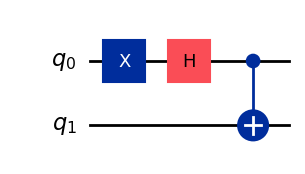

In [45]:
phi_minus = QuantumCircuit(2)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)

result = simulator.run(phi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
phi_minus.draw("mpl")

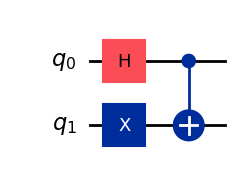

In [46]:
psi_plus = QuantumCircuit(2)
psi_plus.h(0)
psi_plus.x(1)
psi_plus.cx(0,1)

result = simulator.run(psi_plus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, 1/np.sqrt(2), 1/np.sqrt(2), 0])
psi_plus.draw("mpl")

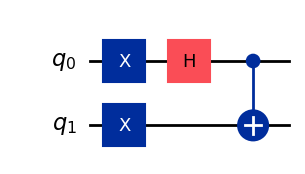

In [47]:
psi_minus = QuantumCircuit(2)
psi_minus.x(0)
psi_minus.h(0)
psi_minus.x(1)
psi_minus.cx(0,1)

result = simulator.run(psi_minus).result()
sv = result.get_statevector()
assert np.allclose(sv.data,[0, -1/np.sqrt(2), 1/np.sqrt(2), 0])
psi_minus.draw("mpl")

Q2. Let's implement logic gates using quantum circuits. 

Note: All the logic gates implemented here have $\ket{0}$ as the input. If you want to check the answer by changing the input to $\ket{1}$ to validate the truth table, you can place `Pauli X` gates just after initialzing the quantum circuit.

In [48]:
simulator = Aer.get_backend("qasm_simulator")

{'1': 1024}


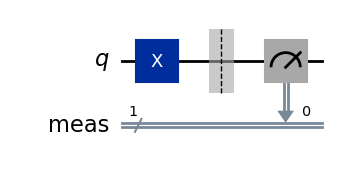

In [49]:
not_gate = QuantumCircuit(1)
not_gate.x(0)
not_gate.measure_all()

result = simulator.run(not_gate).result()
counts = result.get_counts()
print(counts)
not_gate.draw("mpl")

{'0': 1024}


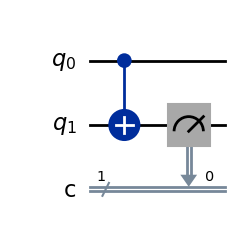

In [50]:
xor_gate = QuantumCircuit(2,1)
xor_gate.cx(0,1)
xor_gate.measure(1,0)

result = simulator.run(xor_gate).result()
counts = result.get_counts()
print(counts)
xor_gate.draw("mpl")

{'0': 1024}


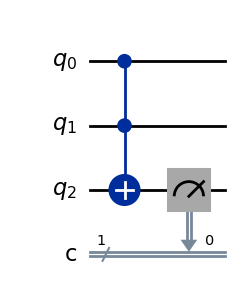

In [51]:
and_gate =  QuantumCircuit(3,1)
and_gate.ccx(0,1,2)
and_gate.measure(2,0)

result = simulator.run(and_gate).result()
counts = result.get_counts()
print(counts)
and_gate.draw("mpl")

{'0': 1024}


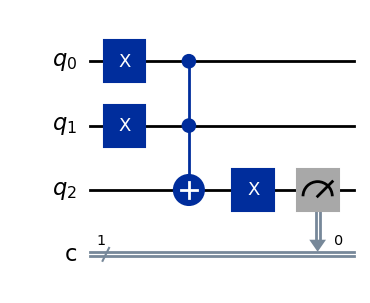

In [53]:
or_gate = QuantumCircuit(3,1)
or_gate.x(0)
or_gate.x(1)
or_gate.ccx(0,1,2)
or_gate.x(2)
or_gate.measure(2,0)

result = simulator.run(or_gate).result()
counts = result.get_counts()
print(counts)
or_gate.draw("mpl")

Q3. Implement GHZ state $\frac{1}{\sqrt{2}}(\ket{000} + \ket{111})$

{'000': 531, '111': 493}


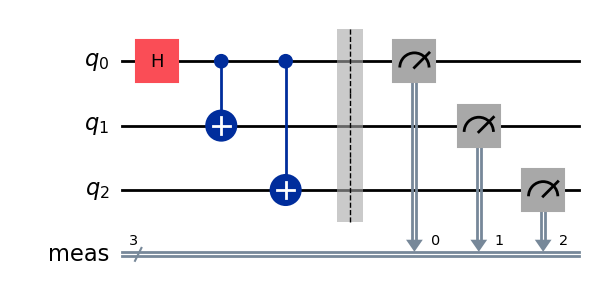

In [54]:
ghz =  QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2) # Implement your circuit here
ghz.measure_all()

result = simulator.run(ghz).result()
counts = result.get_counts()
print(counts)
ghz.draw("mpl")

Q4. Design a Quantum Circuit which corresponds to this statevector

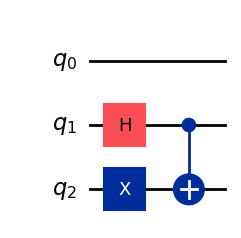

In [56]:
required_sv = [ 0+0j, 0+0j, 0.707+0j, 0+0j, 0.707+0j, 0+0j, 0+0j, 0+0j ]
qc = QuantumCircuit(3)
qc.h(1)
qc.x(2)
qc.cx(1,2)

simulator = Aer.get_backend("statevector_simulator")
result = simulator.run(qc).result()
sv = result.get_statevector()
assert np.allclose(sv.data,required_sv, rtol=0.001)
qc.draw("mpl")